### Ensemble Piecewise Linear regression model V17
try random forest regressor with deeper trees and more trees (see cell 14)

In [1]:
fileprefix='./lateness_PREP_V10_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 215)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,lead_organizer_created_at_pdt_hour,creator_id,claimed_at_pdt_hour_14,origin_region_name_East Bay South,scheduled_starts_at_pdt_month,carpool_int,scheduled_starts_at_pdt_weekofyear,scheduled_starts_at_pdt_hour_2,origin_region_name_Central LA - West,...,destination_region_id,claimed_at_pdt_hour_6,organizers_count,scheduled_starts_at_pdt_hour_5,scheduled_starts_at_pdt_hour_6,origin_region_name_Ventura,lead_organizer_created_at_pdt_month,scheduled_starts_at_pdt_month_2,origin_region_name_Pomona Valley,driver_id
0,5,19,81281,0,0,2,0,7,0,0,...,36.0,0,1.0,0,0,0,7,1,0,62969.0
1,6,19,80068,0,0,1,0,4,0,0,...,36.0,0,1.0,0,0,0,7,0,0,62969.0
2,7,20,87802,0,0,2,0,6,0,0,...,48.0,0,1.0,0,0,0,7,1,0,62969.0
3,8,20,81561,0,0,1,0,4,0,0,...,36.0,0,1.0,0,0,0,7,0,0,62969.0
4,9,19,76793,0,0,1,0,4,0,0,...,33.0,0,1.0,0,0,0,7,0,0,62969.0


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [12]:
# break df_X,y into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)

In [13]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100540, 215)
(25135, 215)
(100540,)
(25135,)


In [14]:
# select a regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=4, random_state=808, n_estimators=200)

In [15]:
# fit model
model=model.fit(X_train,y_train)

In [16]:
print(model.feature_importances_)

[5.19983429e-05 7.08064431e-04 1.11457761e-04 0.00000000e+00
 0.00000000e+00 3.62133458e-06 0.00000000e+00 1.96302589e-06
 0.00000000e+00 3.56948411e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.34979471e-03 3.31724133e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.66565344e-04 7.77375008e-06 1.22226886e-04 0.00000000e+00
 1.11656951e-01 0.00000000e+00 0.00000000e+00 3.68542928e-05
 1.07003121e-03 8.74829835e-05 2.45992046e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.70016091e-05 0.00000000e+00
 0.00000000e+00 3.06559376e-05 0.00000000e+00 3.64232077e-05
 2.67080219e-03 3.51818090e-04 6.15348158e-05 0.00000000e+00
 2.53874756e-05 0.00000000e+00 5.01982406e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.60535406e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35906328e-04 0.00000000e+00
 0.00000000e+00 2.138772

In [17]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.34620238152403837, 'scheduled_starts_at_pdt_hour'),
 (0.15432835083653867, 'claimed_before_trip_start_secs'),
 (0.1269067486802626, 'scheduled_ends_at_pdt_hour'),
 (0.11165695070394388, 'driver_home_lat'),
 (0.10402032382677313, 'driver_previous_completed_trips'),
 (0.037797202968858266, 'driver_signup_before_trip_start_secs'),
 (0.037615785760697185, 'driver_created_at_pdt_dayofyear'),
 (0.026934289381928954, 'driver_signup_before_trip_claimed_secs'),
 (0.015879329708056153, 'driver_id'),
 (0.004523384116608959, 'driver_home_lon'),
 (0.003205262313053591, 'driver_created_at_pdt_weekofyear'),
 (0.0026708021936665606, 'trip_claimed_after_trip_created'),
 (0.0024459218254744754, 'trip_est_duration_secs'),
 (0.002349794707263142, 'total_predicted_duration'),
 (0.002083902341749663, 'claimed_after_created'),
 (0.0019818600653778717, 'destination_lat'),
 (0.0015558484460120594, 'trip_predicted_raw_fare'),
 (0.001382862835275156, 'scheduled_ends_at_pdt_dayofyear'),
 (0.001296193275898273

In [18]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['scheduled_starts_at_pdt_hour', 'claimed_before_trip_start_secs', 'scheduled_ends_at_pdt_hour', 'driver_home_lat', 'driver_previous_completed_trips', 'driver_signup_before_trip_start_secs', 'driver_created_at_pdt_dayofyear', 'driver_signup_before_trip_claimed_secs', 'driver_id', 'driver_home_lon'])

In [19]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

95

In [20]:
# number of features wiht importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

9

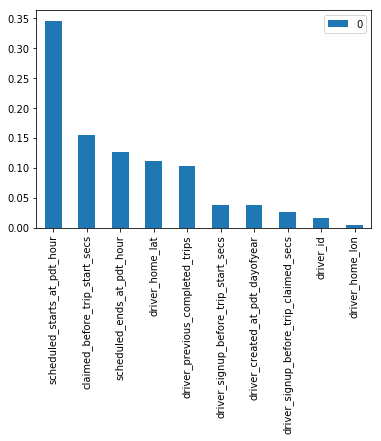

In [36]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [22]:
# score against TRAINING set
model.score(X_train,y_train)

0.06271157881530454

In [23]:
# score against TEST set
model.score(X_test,y_test)

0.06510468325141228

In [24]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25135

In [25]:
type(model_y_test_pred)

numpy.ndarray

In [26]:
model_y_test_pred[:10]

array([-517.91628859, -413.00817159, -413.00817159, -504.59527536,
       -548.74519117, -416.47415   , -257.04772021, -504.59527536,
       -504.59527536, -413.00817159])

In [27]:
pd.Series(model_y_test_pred).std()

114.24146089110701

In [28]:
pd.Series(model_y_test_pred).corr(y_test)

-0.03061082387698781

In [29]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.065 8.26 245342 0.065 371 280 4.67


In [30]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [31]:
np.digitize(y_test, bins)[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [32]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21156]
 [    1  2939]
 [    2   892]
 [    3   148]]


In [33]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 25067]
 [    1    19]
 [    2    44]
 [    3     5]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91     21156
          1       0.26      0.00      0.00      2939
          2       0.25      0.01      0.02       892
          3       0.40      0.01      0.03       148

avg / total       0.75      0.84      0.77     25135



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21144     4     7     1]
 [ 2920     5    14     0]
 [  875     4    11     2]
 [  128     6    12     2]]
